# Выбор локации для скважины

## Загрузка и подготовка данных

Импортирую библиотеку pandas. Здесь будут храниться все импорты за проект.

In [1]:
import numpy as np
from numpy.random import RandomState

import os

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats as st

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Загрузка данных

Заружаю файлы по трем регионам:

In [2]:
region_1 = pd.read_csv('/datasets/geo_data_0.csv')
region_2 = pd.read_csv('/datasets/geo_data_1.csv')
region_3 = pd.read_csv('/datasets/geo_data_2.csv')

### Первичный анализ данных

Визуальная оценка датасета первого региона:

In [3]:
display(region_1.head(10))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


Данные выглядят нормально, посмотрим, что в информации по датафрейму:

In [4]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
print(region_1.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


В таблице 5 столбцов с типами данных float64 и object, и 100 000 строк. Явных пропусков в данных нет.

Визуальная оценка датасета второго региона:

In [6]:
display(region_2.head(10))

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [7]:
region_2['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

Данные выглядят ненормально.

In [8]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
print(region_2.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


В таблице также 5 столбцов с типами данных float64 и object, и 100 000 строк. Явных пропусков в данных нет.

Посмотрим на третий датасет:

In [10]:
display(region_3.head(10))

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Выглядит хорошо.

In [11]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
print(region_3.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


Аналогично, в таблице также 5 столбцов с типами данных float64 и object, и 100 000 строк. Явных пропусков в данных нет.

На первый взгляд проблем с данными нет.

### Предобработка данных

#### Поиск дубликатов

Изучу датасеты на предмет наличия дубликатов:

In [13]:
print('Дубликатов строк в region_1:', region_1.duplicated().sum() )

Дубликатов строк в region_1: 0


In [14]:
print('Дубликатов строк в region_2:', region_2.duplicated().sum() )

Дубликатов строк в region_2: 0


In [15]:
print('Дубликатов строк в region_3:', region_3.duplicated().sum() )

Дубликатов строк в region_3: 0


Дублирующих строк не обнаружено. Есть смысл изучить дубликаты столбца `id`:

In [16]:
print(region_1['id'].duplicated().sum())

10


In [17]:
print(region_2['id'].duplicated().sum())

4


In [18]:
print(region_3['id'].duplicated().sum())

4


Id повторяются, изучим визуально эти строки:

In [19]:
display(region_1[region_1.duplicated(subset='id', keep=False)])

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
1364,bxg6G,0.411645,0.856830,-3.653440,73.604260
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


In [20]:
display(region_2[region_2.duplicated(subset='id', keep=False)])

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [21]:
display(region_3[region_3.duplicated(subset='id', keep=False)])

,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


Видимо, несколько раз взяты разные данные по одной и той же скважине. Повторов довольно мало, вряд ли это повлияет на обучение модели, не буду трогать.

#### Количественные данные

Изучим есть ли особенности в количественных признаках:

Посмотрим, как распределены данные

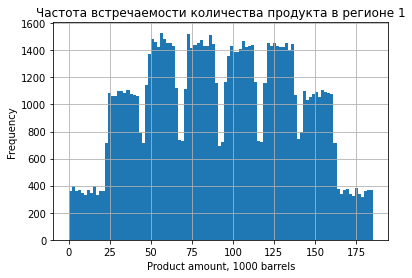

In [22]:
plt_region_1 = region_1['product'].hist(bins=100)

plt.xlabel('Product amount, 1000 barrels') # подписи осей
plt.ylabel('Frequency')
plt.title('Частота встречаемости количества продукта в регионе 1') # заголовок
plt.show()

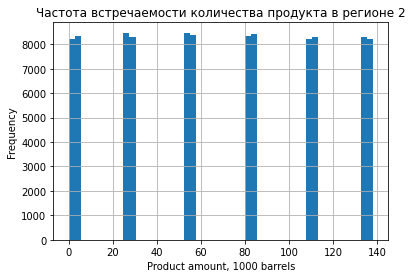

In [23]:
plt_region_1 = region_2['product'].hist(bins=50)
plt.xlabel('Product amount, 1000 barrels') # подписи осей
plt.ylabel('Frequency')
plt.title('Частота встречаемости количества продукта в регионе 2') # заголовок
plt.show()

In [24]:
print(region_2['product'].value_counts())

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64


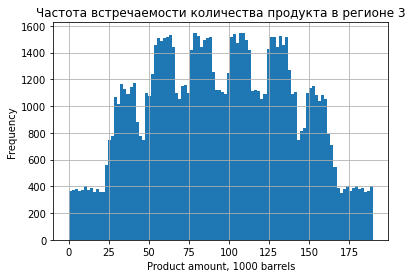

In [25]:
plt_region_1 = region_3['product'].hist(bins=100)
plt.xlabel('Product amount, 1000 barrels') # подписи осей
plt.ylabel('Frequency')
plt.title('Частота встречаемости количества продукта в регионе 3') # заголовок
plt.show()

Графики распределения прибыли напоминают нормальные распределения, а график второго - наличие определенных кластеров значений.

Не знаю пока, какие выводы можно сделать по данным графикам, пока можно обратить внимание на природу распределения, отличного от нормального и поискать закономерности в случае необходимости.

### Вывод

Данные по трем регионам загружены. Явных проблем в данных нет. Исследована корректность данных и наличие особенностей в них. Данные первого и третьего региона распределены непрерывно, данные второго региона имеют дискретную природу распределения, что может быть связано с особенностями добычи продукта в данном регионе. Имеется большое количество нулевых значений неизвестной природы (возможно, получить нефть в этих точках не смогли).

## Обучение и проверка модели

### Обучение моделей

In [26]:
# Определение фичей и таргетов для каждого региона
regions = [region_1, region_2, region_3]
region_features_targets_train = []
region_features_targets_valid = []


for region_index in range(len(regions)):
    features = regions[region_index].drop(['product', 'id'], axis=1)
    targets = regions[region_index]['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, targets, test_size=0.25, random_state=12345)
    
    # Разделение фичей и таргетов на тренировочные и валидационные
    region_features_targets_train.append([features_train, target_train])
    region_features_targets_valid.append([features_valid, target_valid])


_Важно:  К региону фичей буду обращаться в списках через индексы. Номер региона = (индекс списка - 1). Фичи в списках `region_features_targets_valid` и `region_features_targets_valid` находятся в подсписках под индексом `0`, таргеты - в подсписках под индексом `1`:_

        Фичи региона тренировочной выборки = region_features_targets_train[Индекс региона][0]
        Таргеты региона валидационной выборки = region_features_targets_train[Индекс региона][1]

In [27]:
# Проверка правильности разделения фичей и таргетов на примере первого региона
print('Тренировочные фичи и таргеты первого региона:')
display(region_features_targets_train[0][0].head())
display(region_features_targets_train[0][1].head())

print('Размер данных тренировочных таргетов первого региона:', region_features_targets_valid[1][0].shape)
print('Размер данных тренировочных фичей первого региона:', region_features_targets_valid[1][1].shape)
print()
print('Валидационные фичи и таргеты первого региона:')
display(region_features_targets_valid[1][0].head())
display(region_features_targets_valid[1][1].head())
print()
print('Размер данных валидационных таргетов первого региона:', region_features_targets_valid[1][0].shape)
print('Размер данных валидационных фичей первого региона:', region_features_targets_valid[1][1].shape)


Тренировочные фичи и таргеты первого региона:


,f0,f1,f2
27212,0.022450,0.951034,2.197333
7866,1.766731,0.007835,6.436602
62041,0.724514,0.666063,1.840177
70185,-1.104181,0.255268,2.026156
82230,-0.635263,0.747990,6.643327


27212    147.370612
7866     147.630053
62041     77.696728
70185     55.210501
82230    113.891723
Name: product, dtype: float64

Размер данных тренировочных таргетов первого региона: (25000, 3)
Размер данных тренировочных фичей первого региона: (25000,)

Валидационные фичи и таргеты первого региона:


,f0,f1,f2
71751,-0.371866,-1.862494,3.002210
80493,9.015122,-13.881455,1.995363
2655,-6.507568,-4.817448,1.003449
53233,14.560845,-10.667755,1.995175
91141,6.090476,-4.494723,0.013815


71751    80.859783
80493    53.906522
2655     30.132364
53233    53.906522
91141     0.000000
Name: product, dtype: float64


Размер данных валидационных таргетов первого региона: (25000, 3)
Размер данных валидационных фичей первого региона: (25000,)


Пропорции правильные, данные разделены верно

Функция для автоматизации обучения моделей

In [28]:
def fit_model(features, target):
    scaler = StandardScaler()
    scaler.fit(features)
    features_scaled = scaler.transform(features)
    model_LinearR = LinearRegression()
    model_LinearR.fit(features_scaled, target)
    print("Модель линейной регрессии для региона обучена.")    
    return model_LinearR, scaler

models = []
scalers = []

for region_index in range(len(region_features_targets_train)):
    features_train = region_features_targets_train[region_index][0]
    target_train = region_features_targets_train[region_index][1]
    print("Регион " + str(region_index+1) + ':')
    model, scaler = fit_model(features_train, target_train)
    models.append(model)
    scalers.append(scaler)

Регион 1:
Модель линейной регрессии для региона обучена.
Регион 2:
Модель линейной регрессии для региона обучена.
Регион 3:
Модель линейной регрессии для региона обучена.


Получу предсказания моделей по всем регионам:

In [29]:
def predict_model(model, scaler, features):
    return model.predict(scaler.transform(features))

predictions_list = []

for region_index in range(len(models)):
    features_valid = region_features_targets_valid[region_index][0]

    model = models[region_index]
    scaler = scalers[region_index]
    predicted_valid = predict_model(model, scaler, features_valid) # Предсказания для региона 
    predictions_list.append(predicted_valid) # Добавляю в список
    
    
print('Список предсказаний для регионов 1, 2, 3 соответственно:')
display(predictions_list)

Список предсказаний для регионов 1, 2, 3 соответственно:


[array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
        118.18039721, 118.16939229]),
 array([ 82.66331365,  54.43178616,  29.74875995, ..., 137.87934053,
         83.76196568,  53.95846638]),
 array([ 93.59963303,  75.10515854,  90.06680936, ...,  99.40728116,
         77.77991248, 129.03241718])]

### Проверка моделей

In [30]:
mse_lst = []
for region_index in range(len(predictions_list)):
    mse = mean_squared_error(region_features_targets_valid[region_index][1], predictions_list[region_index])
    print("MSE для " + str(region_index+1) + ' региона =', mse)
    print("RMSE для ", str(region_index+1) + ' региона =', mse ** 0.5)
    print()
    mse_lst.append(mse)

MSE для 1 региона = 1412.2129364399243
RMSE для  1 региона = 37.5794217150813

MSE для 2 региона = 0.7976263360391157
RMSE для  2 региона = 0.893099286775617

MSE для 3 региона = 1602.3775813236196
RMSE для  3 региона = 40.02970873393434



Меньше всего разброс данных во втором регионе.

In [31]:
mean_pred_product_lst = []
def mean_product(predictions_lst, mean_pred_product_lst):
    for region_index in range(len(predictions_lst)):
        prediction = predictions_lst[region_index]
        print('Cредний запас предсказанного сырья в регионе №', region_index + 1, '=', prediction.mean())
        mean_pred_product_lst.append(prediction.mean())
        
mean_product(predictions_list, mean_pred_product_lst)

Cредний запас предсказанного сырья в регионе № 1 = 92.59256778438035
Cредний запас предсказанного сырья в регионе № 2 = 68.728546895446
Cредний запас предсказанного сырья в регионе № 3 = 94.96504596800489


In [32]:
print('Список среднего запаса предсказанного сырья для регионов 1, 2, 3 соответственно:') 
print(mean_pred_product_lst)

Список среднего запаса предсказанного сырья для регионов 1, 2, 3 соответственно:
[92.59256778438035, 68.728546895446, 94.96504596800489]


Чтобы оценить качество работы моделей, посчитаю коэфициент детерминации:

In [33]:
r2_lst = []
for region_index in range(len(predictions_list)):
    print()
    print("Регион №" + str(region_index + 1) + ':')
    predicted_valid = predictions_list[region_index]
    target_valid = region_features_targets_valid[region_index][1]
    r2 = r2_score(target_valid, predicted_valid)
    print("R2 =", r2_score(target_valid, predicted_valid))
    if r2 > 0:
        print("Метрика R2 больше нуля - модель работает лучше, чем константная. Качество модели хорошее.")
    elif r2 < 0:
        print("Метрика R2 меньше нуля - модель работает хуже константной - качество очень плохое")
    else:
        print('Работа модели не отличается от константной')
    r2_lst.append(r2)



Регион №1:
R2 = 0.27994321524487786
Метрика R2 больше нуля - модель работает лучше, чем константная. Качество модели хорошее.

Регион №2:
R2 = 0.9996233978805127
Метрика R2 больше нуля - модель работает лучше, чем константная. Качество модели хорошее.

Регион №3:
R2 = 0.20524758386040443
Метрика R2 больше нуля - модель работает лучше, чем константная. Качество модели хорошее.


### Вывод

Были поделаны следующие этапы в данном разделе:

   * Создала цикл в котором вытаскиваю из датасетов фичи и таргеты, разделяю их на тренировочные и валидационные и кладу в список фичей и список таргетов. Посмотрела, правильно ли получилось;
   * Написала функцию для автоматизации обучения моделей;
   * Обучила модели в цикле и сохранила в списки модели и соответсвующие им скалеры;
   * Написала функцию для получения предсказаний моделей;
   * Получила предсказания моделей через цикл и сохранила в список;
   * Измерила метрики MSE и RMSE для каждой модели;
   * Посчитала коэфициент детерминации R2 через цикл для модели каждого региона, автоматизировала выводы 

Были созданы следующие списки для дальнейшей работы по 1, 2 и 3 регионам:

   1. `region_features_targets_train` - список пар тренировочных фичей и таргетов для трех регионов
   2. `region_features_targets_valid` - список пар валидационных фичей и таргетов для трех регионов
   3. `models` - список обученных моделей
   4. `scalers` - список соответствующих моделям скалеров
   5. `predictions_list` - список предсказаний
   6. `mse_lst` - список MSE
   7. `mean_pred_product_lst` - список предполагаемых средних значений добытого продукта на основе предсказанных объемов
   8. `r2_lst` - список коэфициентов детерминации

Выявлено, что модель второго региона работает почти идеально на валидационной выборке. Для первого и третьего - предсказывает не идеально, но лучше среднего.

## Подготовка к расчёту прибыли

### Ключевые значения для расчетов

Подготовлю ключевые значения для расчётов сохранить в отдельных переменных.

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

- Бюджет на разработку скважин в регионе — `10 млрд рублей`.
- Один баррель сырья приносит `450 рублей` дохода. Доход с каждой единицы продукта составляет `450 тыс. рублей`, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Нужно посчитать, при каких объемах добычи нефти чистая прибыль больше нуля.

**`Чистая прибыль =  Операционная прибыль - Налоги и кредиты`**

Для этого понадобятся следующие расчеты:

**`Операционная прибыль = Валовая прибыль продукта - операционные расходы продукта`**

**`Валовая прибыль продукта = Оборот продукта - себестоимость продукта`**

**`Оборот с единицы продукта = Доход с каждой единицы продукта региона х объем добытого продукта в регионе`**

**`Cебестоимость единицы продукта = Бюджет на разработку скважин в регионе / Число разрабатываемых скважин в регионе`**


Объявляю необходимые константы для дальнейших расчетов:

In [34]:
REGION_BUDGET = 10 ** 10 # Бюджет региона

Количество точек, которое предполагается к исследованию для разработки скважин:

In [35]:
NUM_POINTS_TO_INVESTIGATE = 500 # Число исследуемых точек

В одном регионе разрабатываю 200 самых прибыльных точек:

In [36]:
NUM_POINTS_FOR_DEVELOPMENT = 200 # Число самых прибыльных точек из NUM_POINTS_TO_INVESTIGATE, которые будут разработаны

Cтоимость разработки одной точки в регионе:

In [37]:
СOST_POINT = REGION_BUDGET / NUM_POINTS_FOR_DEVELOPMENT # Cтоимость разработки одной точки

In [38]:
BARREL_COST = 450 # Доход с одного барелля

In [39]:
K_BARREL_COST = BARREL_COST * 1000 # Доход c одной единицы продукта

Число итераций bootstrap:

In [40]:
ITERATIONS = 1000

### Минимальное среднее количество продукта

Посчитаю минимальное среднее количество продукта в месторождениях региона, достаточное для разработки.

In [41]:
print('minimum_amount_to_develop_per_point'.upper())

MINIMUM_AMOUNT_TO_DEVELOP_PER_POINT


In [42]:
PRODUCT_AMOUNT_TO_DEVELOP = REGION_BUDGET / K_BARREL_COST
print("Общее количество сырья, которое нужно добыть для освоения бюджета:", int(PRODUCT_AMOUNT_TO_DEVELOP), "тысячи баррелей")

Общее количество сырья, которое нужно добыть для освоения бюджета: 22222 тысячи баррелей


In [43]:
MINIMUM_AMOUNT_TO_DEVELOP_PER_POINT = PRODUCT_AMOUNT_TO_DEVELOP / NUM_POINTS_FOR_DEVELOPMENT
print('Требуемый от одной точки объём сырья:', int(MINIMUM_AMOUNT_TO_DEVELOP_PER_POINT), 'тысяч баррелей')

Требуемый от одной точки объём сырья: 111 тысяч баррелей


In [44]:
predictions_sorted = []

for region_index in range(len(predictions_list)):
    result_indice = predictions_list[region_index].argsort()[::-1][:NUM_POINTS_FOR_DEVELOPMENT]
    best_sum = 0
    for index in result_indice:
        best_sum += region_features_targets_valid[region_index][1].to_numpy()[index]
    result = best_sum / NUM_POINTS_FOR_DEVELOPMENT
    predictions_sorted.append(result)

for region_index in range(len(predictions_sorted)):
    if predictions_sorted[region_index] > MINIMUM_AMOUNT_TO_DEVELOP_PER_POINT:
        print('Средний предсказанный объем продукта в регионе', region_index + 1, 'больше минимально необходимого. Можно вести разработку скважин.' )
    else:
        print('Средний предсказанный объем продукта в регионе', region_index + 1, 'меньше минимально необходимого. Разработка в регионе скорее всего будет убыточной.') 

Средний предсказанный объем продукта в регионе 1 больше минимально необходимого. Можно вести разработку скважин.
Средний предсказанный объем продукта в регионе 2 больше минимально необходимого. Можно вести разработку скважин.
Средний предсказанный объем продукта в регионе 3 больше минимально необходимого. Можно вести разработку скважин.


### Выводы

Были подготовлены константы для дальнейших расчетов. Также посчитаны средние предсказанные объемы продукта в каждом регионе, и сравнены с минимально необходимым для безубыточной разработки значением.
Минимальный объём  добываемого сырья в каждой точке = 111 тысяч баррелей. Средняя предсказанная прибыль в предполагаемых лучших точках будет больше минимально необхого во всех трех регионах.

## Расчёт прибыли и рисков 

После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.

Среди них выбирают регион с наибольшей средней прибылью.


Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
Написать выводы: предложить регион для разработки скважин и обоснуйте выбор.

Посчитать квантиль распределения для отрицательных прибылей
Оставить только те регионы где этот квантиль меньше 2.5%

In [45]:
def profit(target, probabilities, K_BARREL_COST, NUM_POINTS_FOR_DEVELOPMENT, СOST_POINT):
    predictions_sorted_indice = probabilities.argsort()[::-1][:NUM_POINTS_FOR_DEVELOPMENT]
    selected = target.to_numpy()[predictions_sorted_indice]
    products = selected.sum()
    revenue = K_BARREL_COST * products
    return revenue - СOST_POINT * NUM_POINTS_FOR_DEVELOPMENT

### Bootstrap

Процедурой бутстреп создам 1000 подвыборок:

In [46]:
state = RandomState(seed=12345)

In [47]:
targets_valid = []
for region_index in range(len(region_features_targets_valid)):
    result = region_features_targets_valid[region_index][1]
    targets_valid.append(result)

mean_revenues = []
risks = []

for region_index in range(len(targets_valid)):
    profit_values = []
    target_valid = targets_valid[region_index].reset_index(drop=True)
    predicted_valid = predictions_list[region_index]
    print("Регион №", region_index+1)
    for i in range(ITERATIONS):
        target_sample = target_valid.sample(NUM_POINTS_TO_INVESTIGATE, replace=True, random_state=state)
        predictions_sample = predicted_valid[target_sample.index]
        profit_values.append(profit(target_sample, predictions_sample, K_BARREL_COST, NUM_POINTS_FOR_DEVELOPMENT, СOST_POINT))

    profit_values = pd.Series(profit_values)
    mean_profit = profit_values.mean()
    mean_revenues.append(mean_profit)
    
    confidence_interval = (int((profit_values.quantile(0.025) / 10**6)), int((profit_values.quantile(0.975) / 10**6)))
    negative_profit_chance = (profit_values < 0).mean()

    print("Средняя прибыль =", int(mean_profit / 10**6), 'миллионов рублей')
    print("95%-ый доверительный интервал:", confidence_interval, 'миллионов рублей')
    print("Риск убытков =", negative_profit_chance * 100, "%")
    risks.append(negative_profit_chance * 100)    
    print()


Регион № 1
Средняя прибыль = 396 миллионов рублей
95%-ый доверительный интервал: (-111, 909) миллионов рублей
Риск убытков = 6.9 %

Регион № 2
Средняя прибыль = 461 миллионов рублей
95%-ый доверительный интервал: (78, 862) миллионов рублей
Риск убытков = 0.7000000000000001 %

Регион № 3
Средняя прибыль = 392 миллионов рублей
95%-ый доверительный интервал: (-112, 934) миллионов рублей
Риск убытков = 6.5 %



### Максимальная средняя прибыль

In [48]:
print(mean_revenues)

[396164984.8023711, 461155817.2772397, 392950475.17060447]


Посмотрю максимальную среднюю прибыль для регионов с риском убытков менее 2,5%:

In [49]:
best_revenues = []
for region_index in range(len(mean_revenues)):
    if risks[region_index] < 2.5:
        best_revenues.append([mean_revenues[region_index], region_index])

best_revenues = np.array(best_revenues)

max_rev_index = best_revenues[:, 0].argmax()


print('Максимальная средняя прибыль равна', int((best_revenues[max_rev_index, 0] / 10** 6)), 
      'млн. рублей в регионе №', int(best_revenues[max_rev_index, 1] + 1))

Максимальная средняя прибыль равна 461 млн. рублей в регионе № 2


### Вывод

Применена техника Bootstrap с 1000 выборок, с помощью которой найдены распределения прибыли в регионах.
Определена возможная средняя прибыль 500 точек каждого региона, найдены 95%-й доверительный интервалы и соответствующие риски убытков. Определена максимальная средняя прибыль, которая равна 461 млн. рублей и соответсвует региону № 2. 

## Summary

В ходе проведенного исследования с помощью машинного обучения был определен регион с максимальной суммарной прибылью отобранных скважин - этим регионом является второй регион, соответствующий датасету `region_2`. 

Данные регионов были исследованы и предобработаны, в ходе чего была выявлена разная природа распределений датасетов - нормальные распределения данных 1 и 3 регионов и дискретное распределение данных 2-го региона. В данных второго региона  присутствует большое количество нулевых значений, природа которых неизвестна и может искажать исследование.

Для каждого региона в автоматизированном режиме были обучены модели, которые предсказали объёмы запасов в новых скважинах. Из предсказанных значений были случайным образом отобраны 500 точек для разработки скважин, среди них были отобраны 200 точек с наилучшими показателями. Посчитаны возможные прибыли и риски техникой Bootstrap, отобраны регионы с рисками менее 2,5% и найдена максимальная возможная средняя прибыль - `461 млн. рублей`. 

Таким образом, компании «ГлавРосГосНефть» рекомендовано исследовать для разработки скважин `второй регион` для добычи нефти, т.к. он, согласно исследованию, определен наиболее прибыльным при минимальных рисках убытков. 